<a href="https://colab.research.google.com/github/Areliortiz/Simulaci-n-/blob/main/tarea_ejercico5_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\text{5.12.}$ Se tiene un sistema de colas formado por dos estaciones en serie.
 Los clientes atendidos en la primera estación pasan enseguida a formar cola en la segunda. En la primera estación de servicio, la razón de llegadas sigue una distribución poisson con media de 20 clientes por hora, y el tiempo de servicio sigue una distribución exponencial con media de 2 minutos por persona. En la siguiente estación, el tiempo de servicio está uniformemente distribuido entre 1 y 2 minutos. Se desea elaborar un programa (pseudo código) para modelar este proceso y calcular el tiempo medio de espera de un cliente en el sistema de colas

$\text{Paso 1: Primera Estación (Modelo M/M/1)}$\
Tasa de llegadas 𝜆=20 clientes por hora.\
Tasa de servicio 𝜇=30 clientes por hora.(el tiempo de servicio es de 2 minutos por cliente).\
 tiempo medio de espera en la cola Wq=
 $W_{q1}$ = $\frac{\lambda_1}{\mu_1 (\mu_1 - \lambda_1)}$ \\
    W_1 = $W_{q1}$ + $\frac{1}{\mu_1}$

$\text{Paso 2: La segunda estación sigue un modelo M/G/1:}$\
Tasa de llegadas λ=20 clientes por hora.\
El tiempo de servicio está uniformemente distribuido entre 1 y 2 minutos.
$W_{q2} = \frac{\lambda \sigma^2}{2 (1 - \rho)}$
W_2 = $W_{q2}$ + $\mu_2$

\section{Paso 3: Tiempo Total en el Sistema}

El tiempo medio total de espera en el sistema, \( W \), es la suma de los tiempos medios de espera en cada una de las estaciones del sistema.

En este contexto, el tiempo total en el sistema se calcula como:

\[
W = W_1 + W_2
\]

Donde:\
W_1 es el tiempo medio de espera en la primera estación.\
W_2 es el tiempo medio de espera en la segunda estación.





In [14]:
#librerias
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Parámetros
tasa_llegadas = 20  # Llegadas por hora
servicio_1 = 2 / 60  # Media de servicio en la primera estación (en horas)
min_servicio_2 = 1 / 60  # Tiempo mínimo de servicio en la segunda estación (en horas)
max_servicio_2 = 2 / 60  # Tiempo máximo de servicio en la segunda estación (en horas)


In [ ]:
# Realizar la simulación 50 veces
tiempos_promedio = [calcular_tiempos() for _ in range(50)]

# Generar histograma de los tiempos promedio
plt.hist(tiempos_promedio, bins=10, edgecolor='black')
plt.title('Histograma de los Tiempos Promedio en el Sistema')
plt.xlabel('Tiempo Promedio (minutos)')
plt.ylabel('Frecuencia')
plt.show()

# Mostrar los tiempos promedio calculados
print(tiempos_promedio)

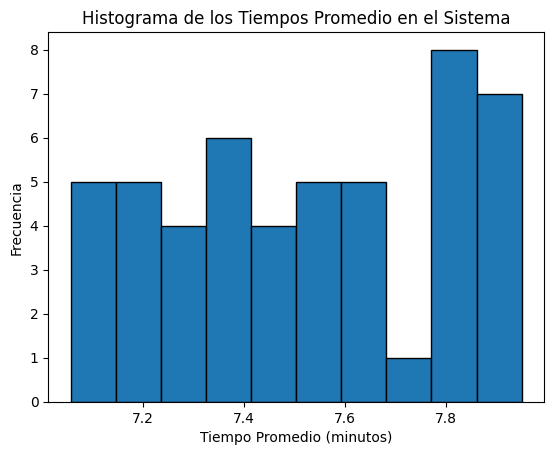

[7.937388654433248, 7.52993947372419, 7.659639597850213, 7.259637899365924, 7.208662821066149, 7.056804691057277, 7.559116803592322, 7.88836208249125, 7.917766730611592, 7.445876980969677, 7.799942482165595, 7.1060375285446025, 7.784138162250203, 7.6053833283870445, 7.35692737028616, 7.479114840014242, 7.8630740107976935, 7.949874337688549, 7.7228797676557965, 7.4129137578176065, 7.455228200069871, 7.190146489081744, 7.256604133122595, 7.66716999680764, 7.665046956615518, 7.555499974548448, 7.482189597029996, 7.348624533738143, 7.092550724309393, 7.234789439390546, 7.294598534268329, 7.139046099059372, 7.7773693006337865, 7.82945876801983, 7.781466298738443, 7.797921588416969, 7.308026706676523, 7.185239268443961, 7.578846027485368, 7.22857065033736, 7.93034794917748, 7.403789055989595, 7.837079262596427, 7.132572482671371, 7.816694323884905, 7.368895357078684, 7.373759684223634, 7.600368679339308, 7.9434549152683545, 7.529543152365115]


In [13]:
# Función para calcular el tiempo medio en el sistema
def calcular_tiempos():
    # Primera estación
    lambda_1 = tasa_llegadas
    mu_1 = 1 / servicio_1

    Wq_1 = lambda_1 / (mu_1 * (mu_1 - lambda_1))  # Tiempo medio de espera en cola (en horas)
    W_1 = Wq_1 + 1 / mu_1  # Tiempo medio total (en horas)

    # Segunda estación (M/G/1)
    lambda_2 = tasa_llegadas
    servicio_2 = np.random.uniform(min_servicio_2, max_servicio_2)  # Tiempo de servicio variable (en horas)
    mu_s = servicio_2  # Media del tiempo de servicio (en horas)
    var_s = ((max_servicio_2 - min_servicio_2) ** 2) / 12  # Varianza del tiempo de servicio (en horas^2)
    rho_2 = lambda_2 * mu_s

    Wq_2 = (lambda_2 * var_s) / (2 * (1 - rho_2))  # Tiempo medio de espera en cola (en horas)
    W_2 = Wq_2 + mu_s  # Tiempo medio total (en horas)

    # Tiempo medio total en el sistema
    W_total = W_1 + W_2  # En horas
    W_total_minutos = W_total * 60  # Convertir a minutos

    return W_total_minutos


